In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [33]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')
submit = pd.read_csv('../csv/sample_submission.csv')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [22]:
drop_train = train.loc[:, "Gender":"MTRANS"]
drop_test = test.loc[:, "Gender":"MTRANS"]
together = pd.concat([drop_train, drop_test])
together.shape

(34598, 16)

In [23]:
categorical = together.select_dtypes(include=["object"]).columns
numerical = together.select_dtypes(include=["int64", "float64"]).columns

In [32]:
for i, col in enumerate(categorical):
    print(together[col])

0          Male
1        Female
2        Female
3        Female
4          Male
          ...  
13835      Male
13836    Female
13837    Female
13838      Male
13839      Male
Name: Gender, Length: 34598, dtype: object
0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
13835    yes
13836     no
13837     no
13838    yes
13839    yes
Name: family_history_with_overweight, Length: 34598, dtype: object
0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
13835     no
13836    yes
13837    yes
13838    yes
13839    yes
Name: FAVC, Length: 34598, dtype: object
0         Sometimes
1        Frequently
2         Sometimes
3         Sometimes
4         Sometimes
            ...    
13835     Sometimes
13836     Sometimes
13837    Frequently
13838     Sometimes
13839     Sometimes
Name: CAEC, Length: 34598, dtype: object
0        no
1        no
2        no
3        no
4        no
         ..
13835    no
13836    no
13837    no
13838    no
13839 

In [ ]:
plt.figure(figsize=(10, 6))
together[col].value_counts().plot.bar()
plt.title(col)
plt.ylabel(col)
plt.show()

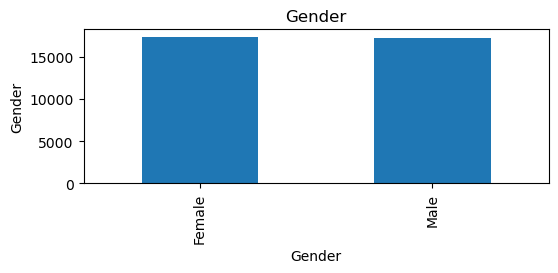

In [30]:
plt.figure(figsize=(6, 2))
together['Gender'].value_counts().plot.bar()
plt.title('Gender')
plt.ylabel('Gender')
plt.show()

<Axes: xlabel='NObeyesdad', ylabel='count'>

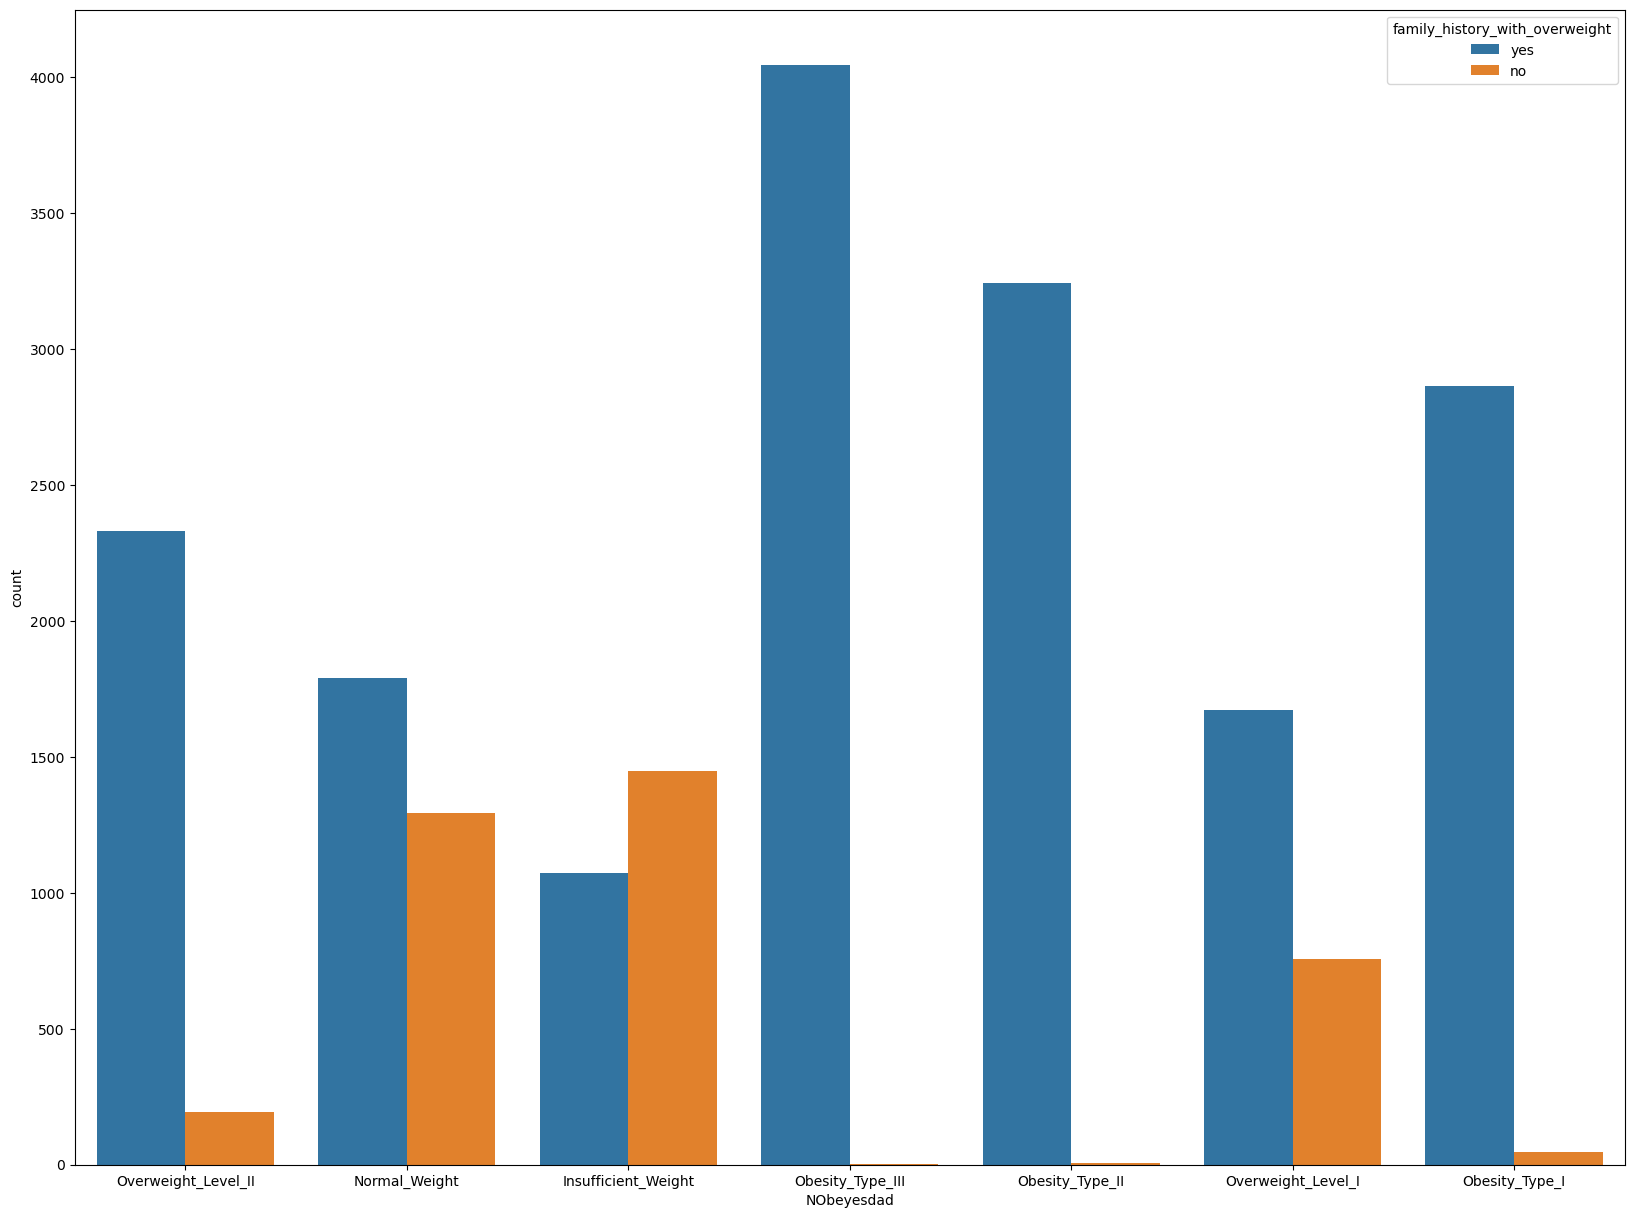

In [34]:
plt.figure(figsize=(20,15))
sns.countplot(data = train, x='NObeyesdad', hue='family_history_with_overweight')

In [55]:
from sklearn.preprocessing import LabelEncoder

def encode_features(data):
    features = data.select_dtypes(include=['object']).columns
    
    for feature in features:
        encoder = LabelEncoder()
        feature_data = encoder.fit(data[feature].astype(str))
        data[feature] = encoder.transform(feature_data.astype(str))
        
    return data

In [56]:
df_train = encode_features(train)
df_test = encode_features(test)

In [13]:
label = df_train['NObeyesdad']
df_train.drop(columns =['NObeyesdad', 'id'], inplace = True)
df_test.drop(columns='id', inplace = True)

In [25]:
from sklearn.preprocessing import MinMaxScaler

def scaler_features(data):
    features = data.select_dtypes(include=["int64", "float64"]).columns
    for feature in features:
        scaler = MinMaxScaler()
        feature_data = data[feature].values.reshape(-1, 1)
        scaler.fit(feature_data)
        data[feature] = scaler.transform(feature_data)
    
    return data

In [26]:
df_train = scaler_features(df_train)
df_test = scaler_features(df_test)

In [29]:
df_train['MTRANS'].describe()

count    20758.000000
mean         2.506841
std          1.148730
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: MTRANS, dtype: float64

# 위에는 연습장

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler

In [2]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')

In [3]:
# 전처리 전, 하나의 데이터프레임으로 합치기
all_df = pd.concat([train,test],sort=False).reset_index(drop=True)
all_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN


In [4]:
# id와 목적변수 제거
all_df = all_df.drop(columns=['id','NObeyesdad'],axis=1)
all_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [5]:
all_df.info()
# null값 없음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          34598 non-null  object 
 1   Age                             34598 non-null  float64
 2   Height                          34598 non-null  float64
 3   Weight                          34598 non-null  float64
 4   family_history_with_overweight  34598 non-null  object 
 5   FAVC                            34598 non-null  object 
 6   FCVC                            34598 non-null  float64
 7   NCP                             34598 non-null  float64
 8   CAEC                            34598 non-null  object 
 9   SMOKE                           34598 non-null  object 
 10  CH2O                            34598 non-null  float64
 11  SCC                             34598 non-null  object 
 12  FAF                             

In [6]:
# 수치형 변수 요약
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000


In [7]:
# 범주형 변수 요약
all_df.describe(include='object').T

,count,unique,top,freq
Gender,34598,2,Female,17387
family_history_with_overweight,34598,2,yes,28398
FAVC,34598,2,yes,31565
CAEC,34598,4,Sometimes,29218
SMOKE,34598,2,no,34173
SCC,34598,2,no,33447
CALC,34598,4,Sometimes,25045
MTRANS,34598,5,Public_Transportation,27798


* 수치형 변수_시각화

/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

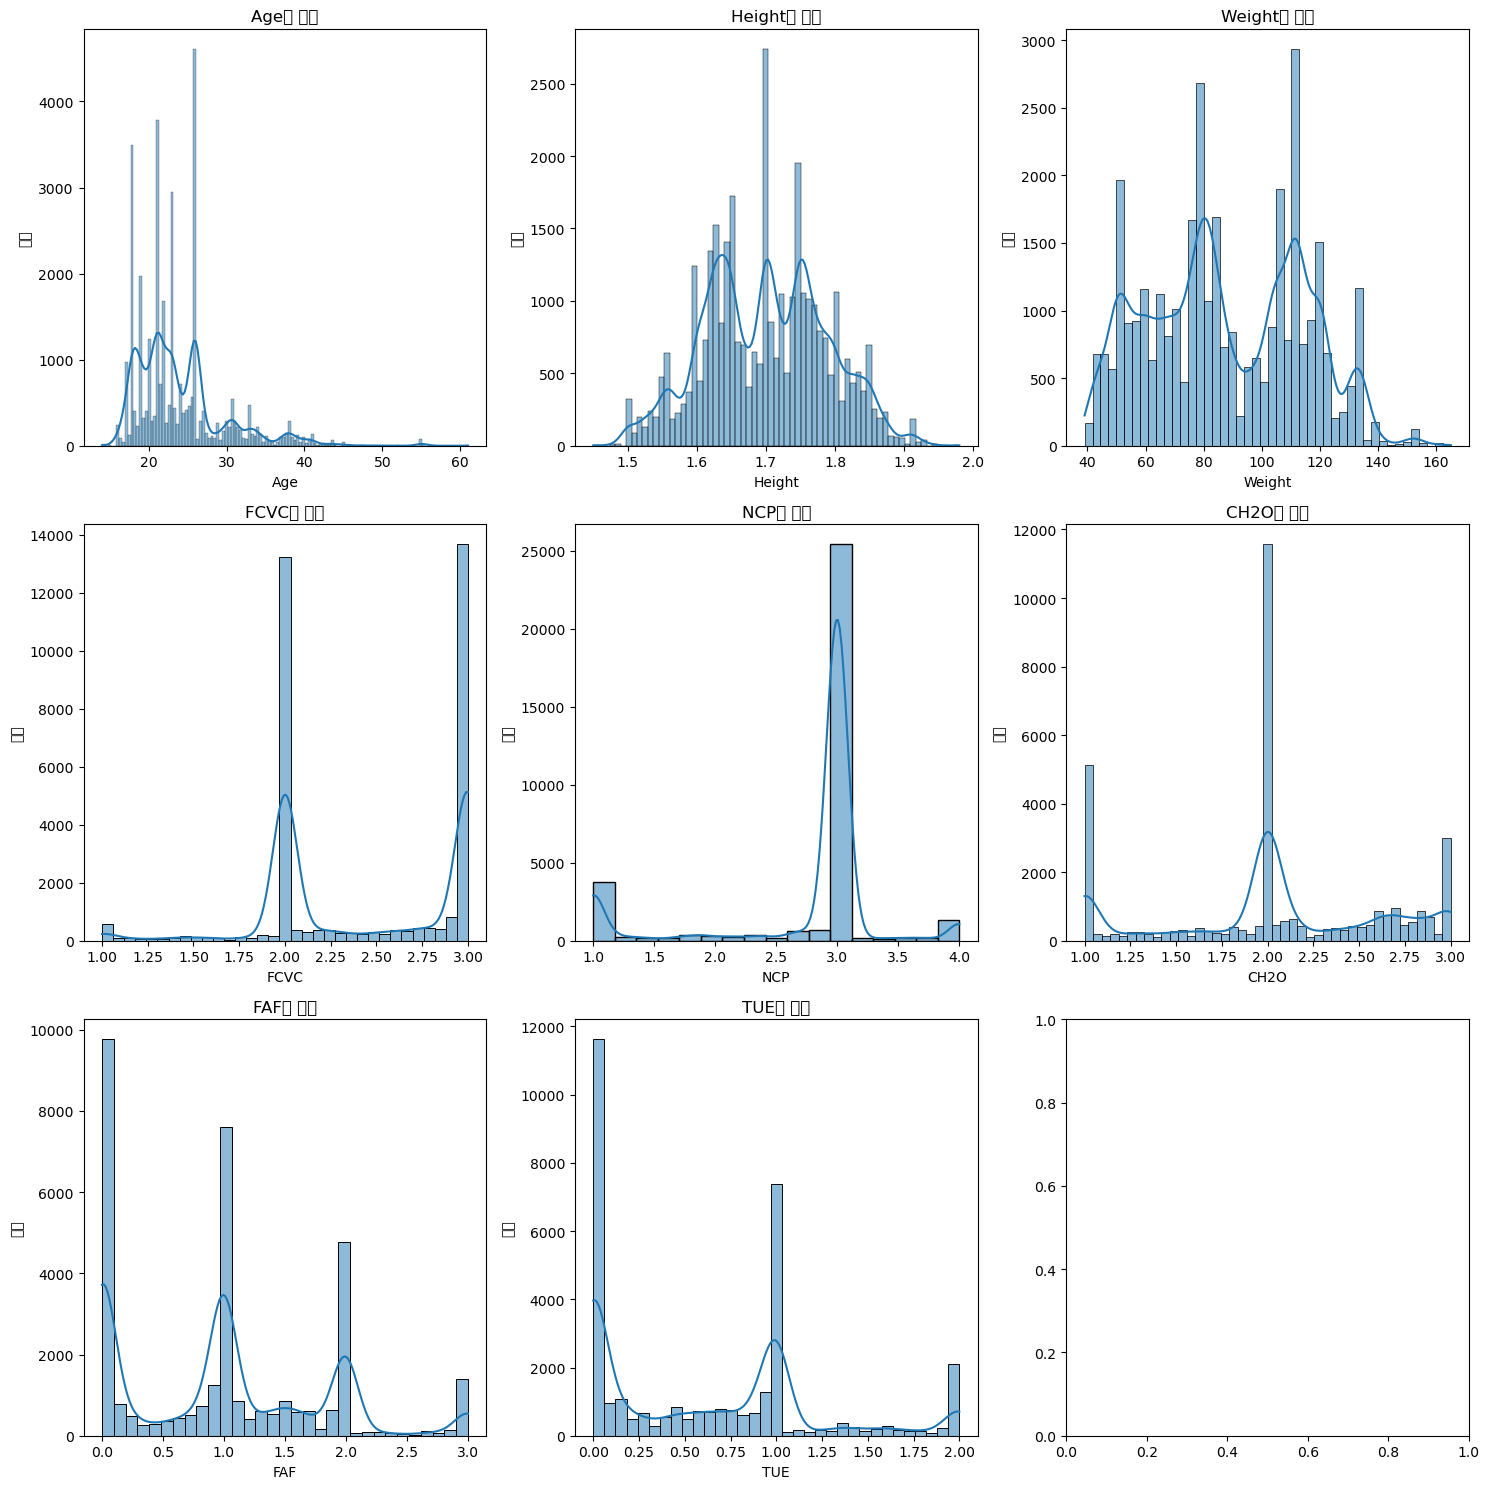

In [8]:
# 분포 시각화

# 수치형 변수 열 선택
numeric_columns = all_df.select_dtypes(include=['float64', 'int64']).columns

# 다중 플롯 설정
num_plots = len(numeric_columns) # 수치형의 len 값 : 8
num_cols = 3  # col = 3
num_rows = -(-num_plots // num_cols)  # -(-8 // 3) -> row = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

plt.rcParams['font.family'] = 'Malgun Gothic'
# 각 수치형 변수에 대해 시각화 수행
for i, column in enumerate(numeric_columns):
    row = i // num_cols # //  두 수를 나누고 정수만 반환 ex) 0 // 3 = 0 , 1 // 3 = 0 , 2 // 3 = 0
    col = i % num_cols # % 나머지 반환 ex) 0 % 3 = 0 , 1 % 3 = 1 , 2 % 3 = 2 , 3 % 3 = 1
    
    sns.histplot(all_df[column], kde=True, ax=axes[row, col])  
    axes[row, col].set_title(f'{column}의 분포')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')

plt.tight_layout()
plt.show()


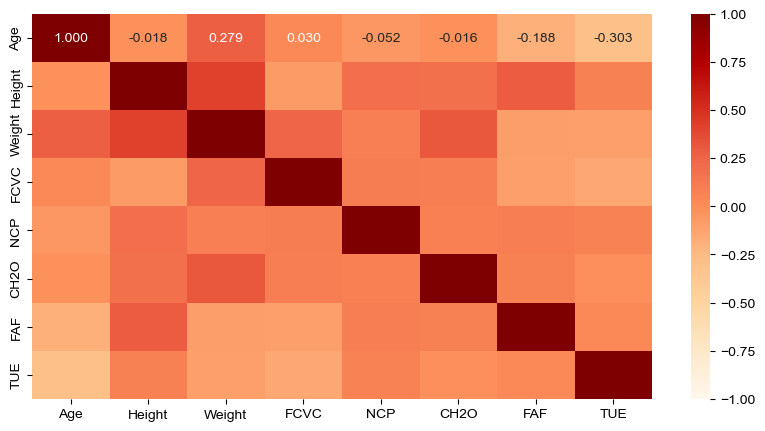

In [9]:
# 상관성 시각화

import seaborn as sns
plt.rcParams['font.family'] = 'Arial'
corr_numerical = all_df[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=True, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

범주형 변수_시각화

/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_12914/2301546838.py:21: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_12914/2301546838.py:21: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


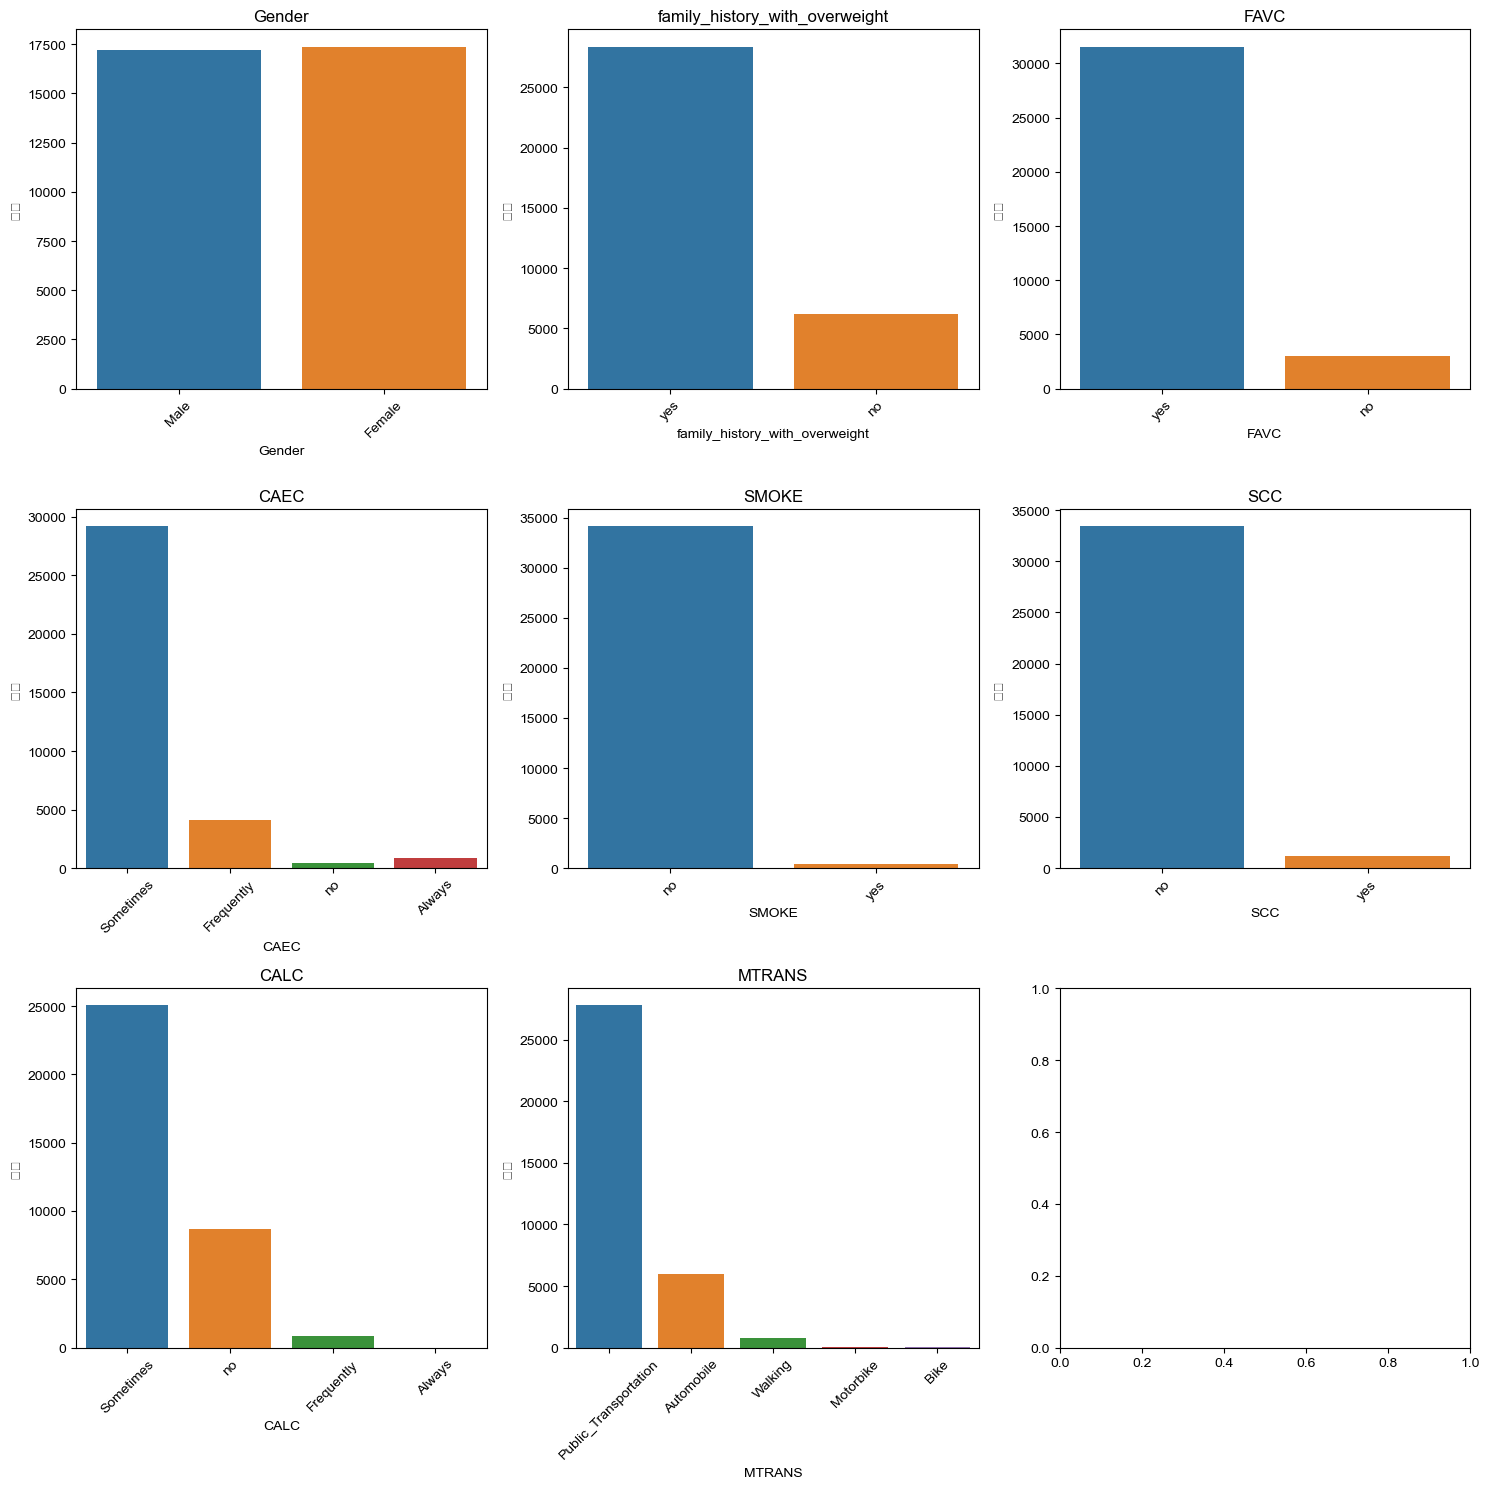

In [10]:
categorical_columns = all_df.select_dtypes(include=['object']).columns

# 다중 플롯 설정
num_plots = len(categorical_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
plt.rcParams['font.family'] = 'Malgun Gothic'

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.countplot(data=all_df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

# !!한글 깨짐 확인 & 색상 스타일 재설정

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_12914/2416374153.py:21: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_12914/2416374153.py:21: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO})

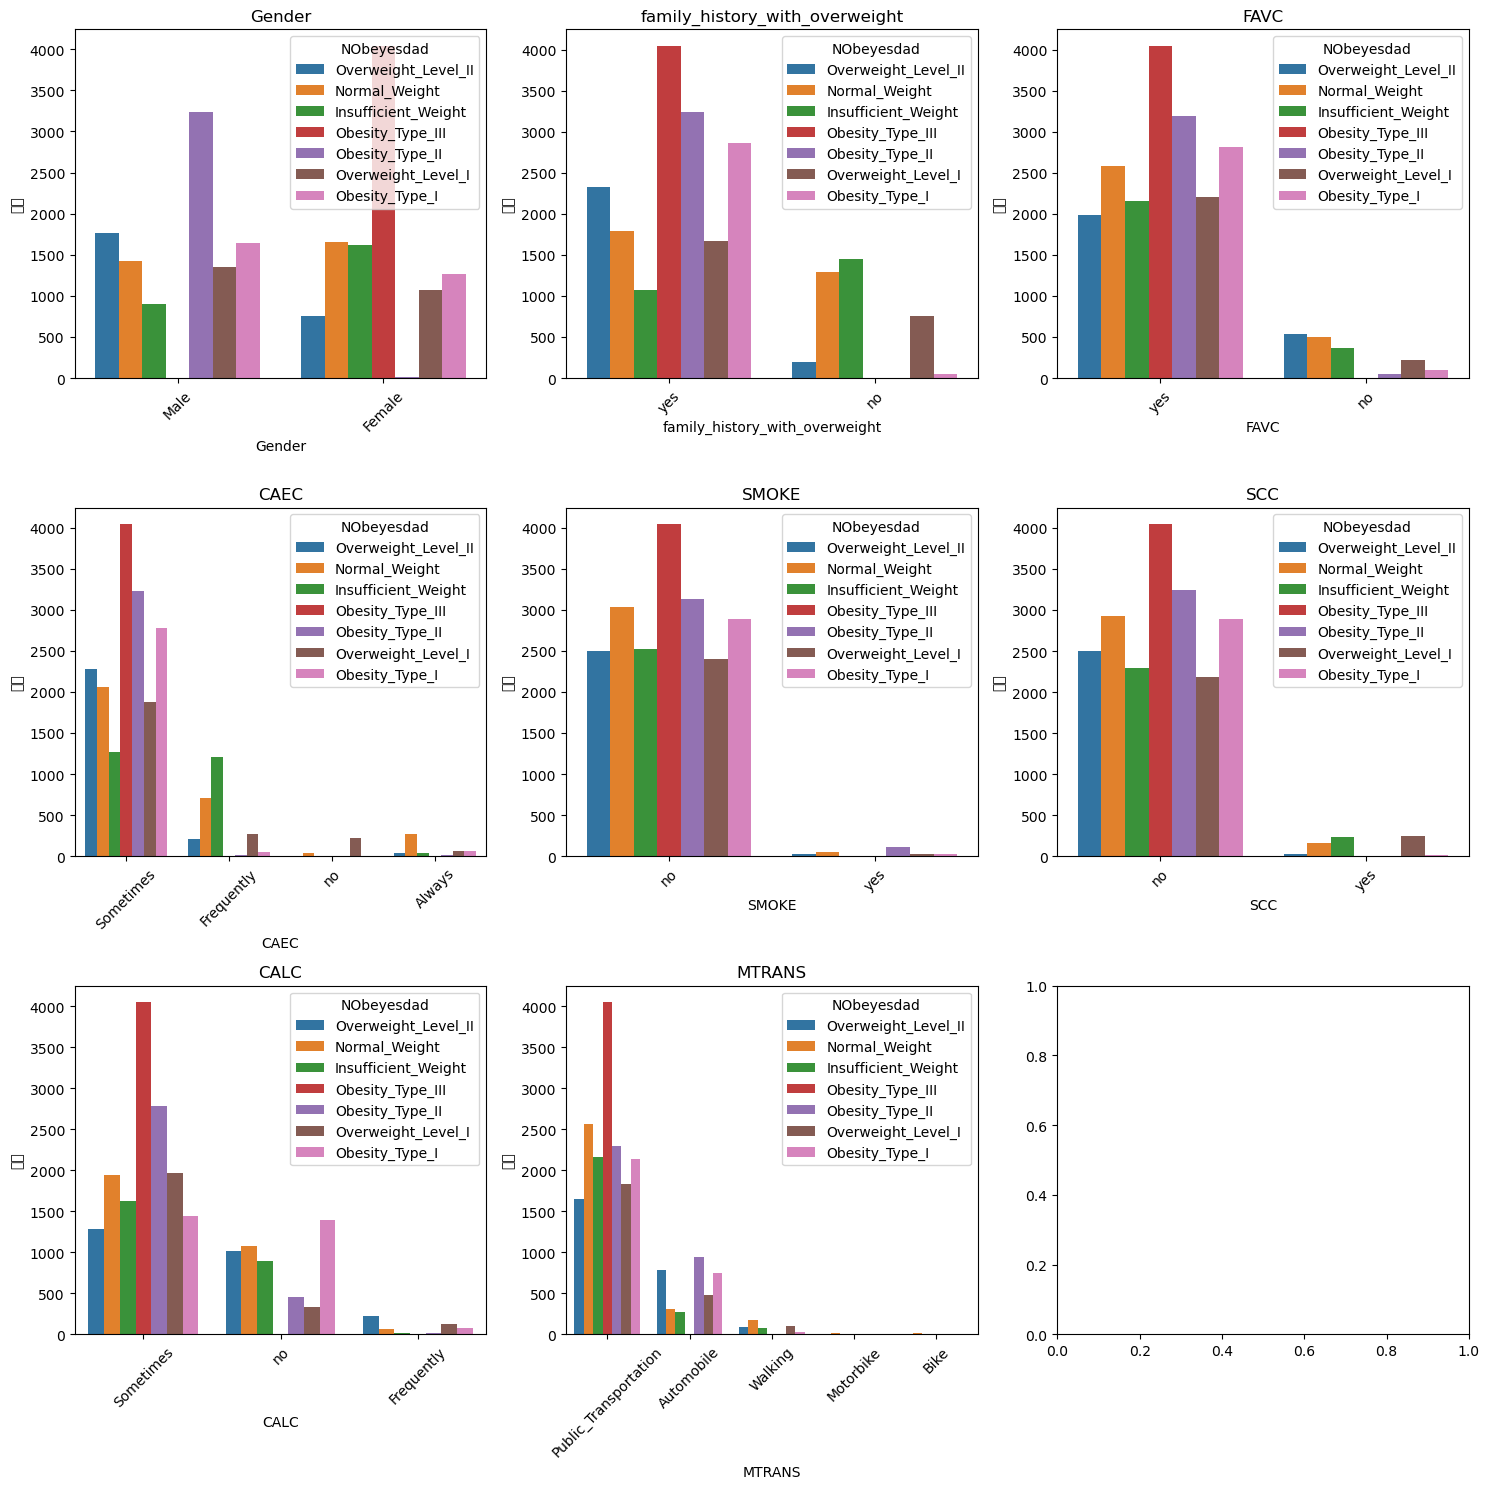

In [11]:
categorical_columns = all_df.select_dtypes(include=['object']).columns

# 다중 플롯 설정
num_plots = len(categorical_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
plt.rcParams['font.family'] = 'Malgun Gothic'

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.countplot(data=train, x=column, hue= train['NObeyesdad'], ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

* 인코딩

In [12]:
''' 
- 원-핫 인코딩: (명목척도 인 것)
gender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)

- 라벨 인코딩: (서열척도 인 것)
caec(4), calc(3)
'''

' \n- 원-핫 인코딩: (명목척도 인 것)\ngender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)\n\n- 라벨 인코딩: (서열척도 인 것)\ncaec(4), calc(3)\n'

In [13]:
# 원-핫 인코딩
all_df = pd.get_dummies(all_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
       'SCC', 'MTRANS'], drop_first=True)
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,Sometimes,2.763573,0.000000,0.976473,Sometimes,True,True,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,Frequently,2.000000,1.000000,1.000000,no,False,True,True,False,False,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,Sometimes,1.910378,0.866045,1.673584,no,False,True,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,Sometimes,1.674061,1.467863,0.780199,Sometimes,False,True,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,Sometimes,1.979848,1.967973,0.931721,Sometimes,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,Sometimes,1.000000,0.807076,0.778632,Sometimes,True,True,False,False,False,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,Sometimes,2.000000,0.000000,0.000000,Sometimes,False,False,True,False,False,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,Frequently,2.000000,1.949840,1.000000,Sometimes,False,False,True,False,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,Sometimes,2.000000,3.000000,2.000000,no,True,True,True,False,False,False,False,True,False


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# 라벨 인코딩
le_cat = ['CAEC', 'CALC']

for cat in le_cat:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == 'object':
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

CAEC
CALC


In [16]:
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2,2.763573,0.000000,0.976473,2,True,True,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,1,2.000000,1.000000,1.000000,3,False,True,True,False,False,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,2,1.910378,0.866045,1.673584,3,False,True,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,2,1.674061,1.467863,0.780199,2,False,True,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,2,1.979848,1.967973,0.931721,2,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,2,1.000000,0.807076,0.778632,2,True,True,False,False,False,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2,2.000000,0.000000,0.000000,2,False,False,True,False,False,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,1,2.000000,1.949840,1.000000,2,False,False,True,False,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2,2.000000,3.000000,2.000000,3,True,True,True,False,False,False,False,True,False


In [17]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,23.886181,5.733207,14.00,20.000000,22.851747,26.000000,61.000000
Height,34598.0,1.699721,0.087895,1.45,1.631856,1.700000,1.761773,1.980000
Weight,34598.0,87.686451,26.273493,39.00,66.000000,84.000000,111.539494,165.057269
FCVC,34598.0,2.444704,0.532568,1.00,2.000000,2.392179,3.000000,3.000000
NCP,34598.0,2.757043,0.707610,1.00,3.000000,3.000000,3.000000,4.000000
CAEC,34598.0,1.846552,0.452257,0.00,2.000000,2.000000,2.000000,3.000000
CH2O,34598.0,2.030469,0.609566,1.00,1.784710,2.000000,2.550570,3.000000
FAF,34598.0,0.978861,0.839122,0.00,0.006892,1.000000,1.583832,3.000000
TUE,34598.0,0.614467,0.604475,0.00,0.000000,0.555591,1.000000,2.000000
CALC,34598.0,2.225360,0.474876,0.00,2.000000,2.000000,3.000000,3.000000


* 표준화

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34598 entries, 0 to 34597
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 34598 non-null  float64
 1   Height                              34598 non-null  float64
 2   Weight                              34598 non-null  float64
 3   FCVC                                34598 non-null  float64
 4   NCP                                 34598 non-null  float64
 5   CAEC                                34598 non-null  int64  
 6   CH2O                                34598 non-null  float64
 7   FAF                                 34598 non-null  float64
 8   TUE                                 34598 non-null  float64
 9   CALC                                34598 non-null  int64  
 10  Gender_Male                         34598 non-null  bool   
 11  family_history_with_overweight_yes  34598

In [20]:
# 데이터프레임에서 수치형 변수 추출
numerical_columns = all_df.select_dtypes(include=['float64']).columns
numerical_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [21]:
# StandardScaler 객체 생성
scaler = StandardScaler()
all_df[numerical_columns]= scaler.fit_transform(all_df[numerical_columns])
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,2,1.202683,-1.166547,0.598886,2,True,True,True,False,False,False,False,True,False
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,1,-0.049985,0.025192,0.637808,3,False,True,True,False,False,False,False,False,False
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,2,-0.197013,-0.134447,1.752153,3,False,True,True,False,False,False,False,True,False
3,-0.511666,0.125258,1.659050,1.042690,0.343353,2,-0.584699,0.582763,0.274179,2,False,True,True,False,False,False,False,True,False
4,1.352648,2.440044,0.232618,0.441189,-1.110191,2,-0.083045,1.178764,0.524850,2,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,2,-1.690520,-0.204723,0.271587,2,True,True,False,False,False,False,False,True,False
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,2,-0.049985,-1.166547,-1.016544,2,False,False,True,False,False,False,False,True,False
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,1,-0.049985,1.157154,0.637808,2,False,False,True,False,False,False,False,True,False
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,2,-0.049985,2.408672,2.292160,3,True,True,True,False,False,False,False,True,False


In [22]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,34598.0,8.379139e-17,1.000014,-1.724397,-0.677847,-0.180431,0.368703,6.473577
Height,34598.0,-5.770926e-17,1.000014,-2.841154,-0.772118,0.003179,0.705991,3.188832
Weight,34598.0,-2.330961e-17,1.000014,-1.853090,-0.825424,-0.140313,0.907888,2.944867
FCVC,34598.0,-2.873141e-16,1.000014,-2.712750,-0.835030,-0.098628,1.042690,1.042690
NCP,34598.0,6.074875e-16,1.000014,-2.483103,0.343353,0.343353,0.343353,1.756581
CAEC,34598.0,1.846552e+00,0.452257,0.000000,2.000000,2.000000,2.000000,3.000000
CH2O,34598.0,-7.136644e-16,1.000014,-1.690520,-0.403176,-0.049985,0.853244,1.590550
FAF,34598.0,-1.887360e-16,1.000014,-1.166547,-1.158333,0.025192,0.720968,2.408672
TUE,34598.0,-1.015560e-16,1.000014,-1.016544,-1.016544,-0.097401,0.637808,2.292160
CALC,34598.0,2.225360e+00,0.474876,0.000000,2.000000,2.000000,3.000000,3.000000


* 데이터 분할

In [23]:
all_df[:20758] # train_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,2,1.202683,-1.166547,0.598886,2,True,True,True,False,False,False,False,True,False
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,1,-0.049985,0.025192,0.637808,3,False,True,True,False,False,False,False,False,False
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,2,-0.197013,-0.134447,1.752153,3,False,True,True,False,False,False,False,True,False
3,-0.511666,0.125258,1.659050,1.042690,0.343353,2,-0.584699,0.582763,0.274179,2,False,True,True,False,False,False,False,True,False
4,1.352648,2.440044,0.232618,0.441189,-1.110191,2,-0.083045,1.178764,0.524850,2,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.218189,0.761205,1.008660,0.891692,0.343353,2,0.199063,0.419085,-0.691167,2,True,True,True,False,False,False,False,True,False
20754,-1.026697,0.116953,-1.434411,1.042690,1.756581,1,-1.690520,1.216932,0.637808,2,True,False,True,False,False,False,False,True,False
20755,-0.660226,1.363419,0.681078,-0.069264,0.343353,2,-0.049985,0.213535,0.966096,3,True,True,True,False,False,False,False,True,False
20756,1.738454,0.003179,-0.158578,0.425367,-1.110191,2,0.187627,-1.166547,0.594520,3,True,True,True,False,False,False,False,False,False


In [24]:
# 다시 학습데이터와 테스트 데이터로 되돌리기

train_X = all_df[:20758]
train_Y = train['NObeyesdad']

test_X = all_df[20758:]

In [25]:
# 목적변수 라벨인코딩
le = LabelEncoder()
le = le.fit(train_Y)

train_Y = le.transform(train_Y)
train_Y

array([6, 1, 0, ..., 3, 6, 3])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=1)

In [27]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=1)

In [30]:
from catboost import CatBoostClassifier, cv, Pool
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# def objective(trial):
#     model = CatBoostClassifier(
#         iterations=trial.suggest_int("iterations", 100, 1000),
#         learning_rate=trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
#         colsample_bylevel=trial.suggest_float("colsample_bylevel", 0.05, 1.0),
#         min_data_in_leaf=trial.suggest_int("min_data_in_leaf", 1, 100),
#         depth=trial.suggest_int("depth", 1, 16),
#         l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
#         bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
#         random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
#         bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
#         od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
#         od_wait=trial.suggest_int("od_wait", 10, 50),
#         verbose=False
#     )
#     model.fit(X_tr, y_tr)
#     y_pred = model.predict(X_test)
#     return accuracy_score(y_test, y_pred)

In [ ]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=50, timeout=600)

In [31]:
model = CatBoostClassifier(iterations=500, depth=5, learning_rate=0.1, loss_function='MultiClass')
model.fit(X_tr, y_tr, eval_set=(X_val, y_val))

0:	learn: 1.6372615	test: 1.6377290	best: 1.6377290 (0)	total: 68.6ms	remaining: 34.2s
1:	learn: 1.4453978	test: 1.4475613	best: 1.4475613 (1)	total: 76ms	remaining: 18.9s
2:	learn: 1.3082306	test: 1.3110249	best: 1.3110249 (2)	total: 83.2ms	remaining: 13.8s
3:	learn: 1.2016770	test: 1.2060438	best: 1.2060438 (3)	total: 90.6ms	remaining: 11.2s
4:	learn: 1.1080457	test: 1.1113440	best: 1.1113440 (4)	total: 98.2ms	remaining: 9.72s
5:	learn: 1.0355407	test: 1.0393685	best: 1.0393685 (5)	total: 106ms	remaining: 8.73s
6:	learn: 0.9708778	test: 0.9740575	best: 0.9740575 (6)	total: 113ms	remaining: 7.97s
7:	learn: 0.9176199	test: 0.9191517	best: 0.9191517 (7)	total: 120ms	remaining: 7.39s
8:	learn: 0.8716215	test: 0.8731464	best: 0.8731464 (8)	total: 127ms	remaining: 6.92s
9:	learn: 0.8330883	test: 0.8363366	best: 0.8363366 (9)	total: 134ms	remaining: 6.59s
10:	learn: 0.7986349	test: 0.8009758	best: 0.8009758 (10)	total: 142ms	remaining: 6.33s
11:	learn: 0.7679522	test: 0.7694303	best: 0.7694

In [32]:
train_pool = Pool(data=X_train, label=y_train)
cv_data = cv(pool=train_pool, params=model.get_params(), fold_count=5)


Training on fold [0/5]
0:	learn: 1.6405875	test: 1.6398985	best: 1.6398985 (0)	total: 24.7ms	remaining: 12.3s
1:	learn: 1.4550320	test: 1.4529679	best: 1.4529679 (1)	total: 37.5ms	remaining: 9.34s
2:	learn: 1.3170662	test: 1.3152178	best: 1.3152178 (2)	total: 51.2ms	remaining: 8.48s
3:	learn: 1.2164612	test: 1.2148935	best: 1.2148935 (3)	total: 66.2ms	remaining: 8.2s
4:	learn: 1.1224779	test: 1.1209973	best: 1.1209973 (4)	total: 80.5ms	remaining: 7.97s
5:	learn: 1.0464888	test: 1.0449859	best: 1.0449859 (5)	total: 95.8ms	remaining: 7.89s
6:	learn: 0.9805044	test: 0.9798359	best: 0.9798359 (6)	total: 111ms	remaining: 7.85s
7:	learn: 0.9264003	test: 0.9264414	best: 0.9264414 (7)	total: 124ms	remaining: 7.61s
8:	learn: 0.8779135	test: 0.8778216	best: 0.8778216 (8)	total: 136ms	remaining: 7.42s
9:	learn: 0.8343033	test: 0.8342747	best: 0.8342747 (9)	total: 148ms	remaining: 7.26s
10:	learn: 0.8000107	test: 0.8004802	best: 0.8004802 (10)	total: 161ms	remaining: 7.16s
11:	learn: 0.7714233	tes

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

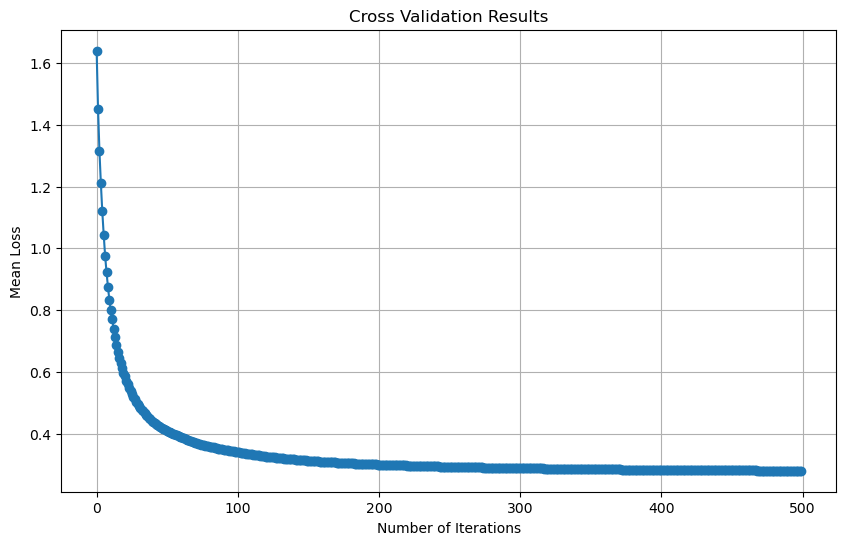

In [34]:
cv_results = cv_data['test-MultiClass-mean']
plt.figure(figsize=(10, 6))
plt.plot(cv_results, marker='o', linestyle='-')
plt.title('Cross Validation Results')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Loss')
plt.grid(True)
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

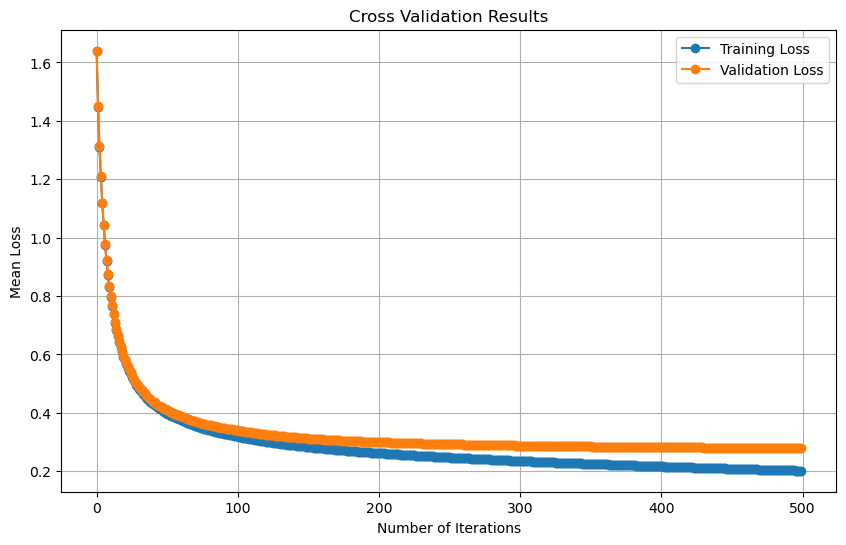

In [35]:
from catboost import CatBoostClassifier, cv, Pool
import matplotlib.pyplot as plt


train_losses = cv_data['train-MultiClass-mean']
val_losses = cv_data['test-MultiClass-mean']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(val_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Cross Validation Results')
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Loss')
plt.legend()
plt.grid(True)
plt.show()


0.9041425818882466
[[495  19   0   0   0   0   0]
 [ 38 517   0   0   0  28   9]
 [  2   1 515  18   1  11  43]
 [  0   0  10 598   0   0   5]
 [  0   0   2   0 868   0   0]
 [  6  39   7   0   0 364  60]
 [  0   6  49   5   0  39 397]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       514
           1       0.89      0.87      0.88       592
           2       0.88      0.87      0.88       591
           3       0.96      0.98      0.97       613
           4       1.00      1.00      1.00       870
           5       0.82      0.76      0.79       476
           6       0.77      0.80      0.79       496

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



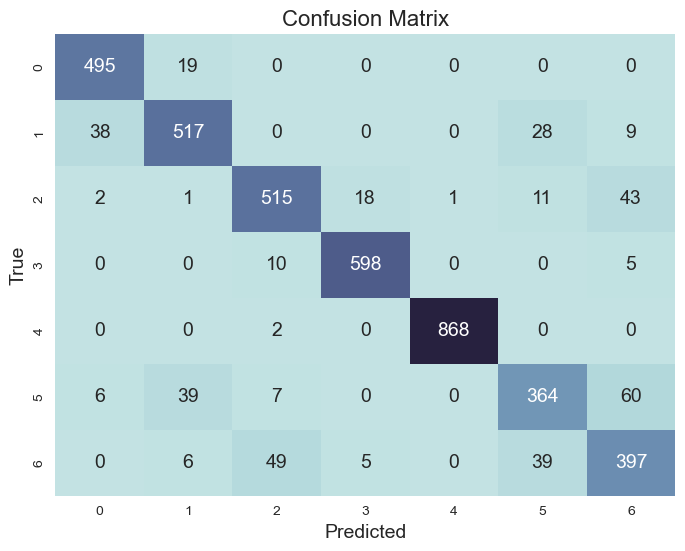

In [ ]:
predictions = model.predict_proba(X_test).argmax(axis=1)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid", {"axes.edgecolor": ".6", "grid.color": ".6"})

cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
heatmap = sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap=cmap, annot_kws={'size': 14}, cbar=False)
heatmap.set_title('Confusion Matrix', fontdict={'fontsize': 16})
heatmap.set_xlabel('Predicted', fontdict={'fontsize': 14})
heatmap.set_ylabel('True', fontdict={'fontsize': 14})

plt.show()

In [ ]:
y_pred = model.predict(test_X)
print(y_pred)

[[3]
 [5]
 [4]
 ...
 [0]
 [1]
 [3]]


In [ ]:
submission = pd.read_csv('../csv/submission.csv')
y_prediction = le.inverse_transform(y_pred)
submission['NObeyesdad'] = y_prediction

C:\Users\SSO\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
submission.head(10)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
5,20763,Insufficient_Weight
6,20764,Insufficient_Weight
7,20765,Normal_Weight
8,20766,Overweight_Level_II
9,20767,Normal_Weight
